In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
print("MNIST Veri Seti Yükleniyor")
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

MNIST Veri Seti Yükleniyor


In [3]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
print(f"Eğitim Verilerinin boyutu ve sayısı = {x_train.shape}")
print(f"Test Verilerinin boyutu ve sayısı = {x_test.shape}")

Eğitim Verilerinin boyutu ve sayısı = (60000, 28, 28, 1)
Test Verilerinin boyutu ve sayısı = (10000, 28, 28, 1)


In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
X_train, X_val, y_train_split, y_val = train_test_split(
    x_train,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)
print(f"Veri Bölme Sonrası Boyutları")
print(f"Eğitim Verisi Boyutu: {X_train.shape}")
print(f"Validation Verisi Boyutu: {X_val.shape}")

Veri Bölme Sonrası Boyutları
Eğitim Verisi Boyutu: (48000, 28, 28, 1)
Validation Verisi Boyutu: (12000, 28, 28, 1)


In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
    
])

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    'two_blocks_cnn_for_mnist_dataset.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max', verbase = 1)

In [23]:
history = model.fit(X_train, y_train_split, validation_data=(X_val, y_val),
          batch_size=128, epochs=5, callbacks=model_checkpoint, verbose=1)


Epoch 1/5
375/375 [==============================] - 30s 81ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0279 - val_accuracy: 0.9912
Epoch 2/5
375/375 [==============================] - 31s 82ms/step - loss: 0.0283 - accuracy: 0.9906 - val_loss: 0.0294 - val_accuracy: 0.9911
Epoch 3/5
375/375 [==============================] - 31s 82ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0274 - val_accuracy: 0.9923
Epoch 4/5
375/375 [==============================] - 31s 82ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0270 - val_accuracy: 0.9924
Epoch 5/5
375/375 [==============================] - 31s 84ms/step - loss: 0.0248 - accuracy: 0.9920 - val_loss: 0.0288 - val_accuracy: 0.9918


In [25]:
print("Test Verisi Üzerinde model değerlendirmesi başlıyor...")
test_lost, test_accuracy = model.evaluate(x_test, y_test)
print(f"Modelin Hata Oranı = {test_lost}")
print(f"Modelin Doğruluk Oranı = {test_accuracy}")

Test Verisi Üzerinde model değerlendirmesi başlıyor...
313/313 [==============================] - 2s 7ms/step - loss: 0.0204 - accuracy: 0.9942
Modelin Hata Oranı = 0.020351024344563484
Modelin Doğruluk Oranı = 0.9941999912261963


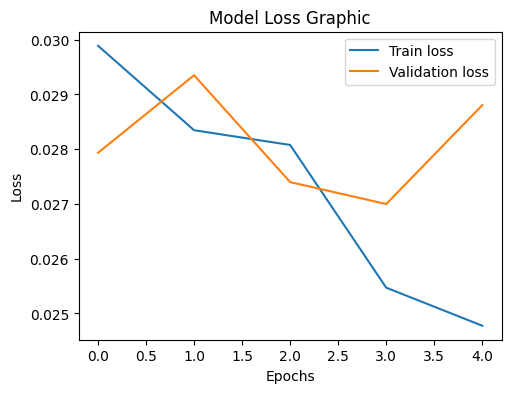

In [42]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["loss"],label="Train loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.title("Model Loss Graphic")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

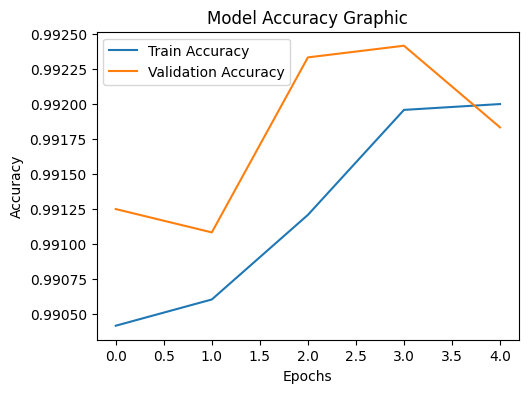

In [40]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],label="Train Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Model Accuracy Graphic")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred,axis=1)
y_test_classes = np.argmax(y_pred,axis=1)

313/313 [==============================] - 2s 7ms/step


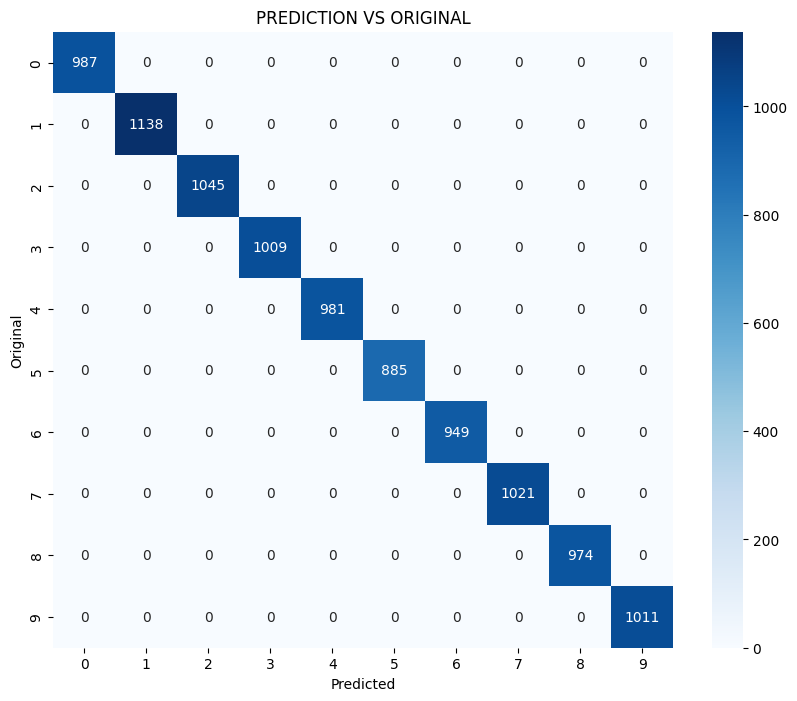

In [48]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, fmt='d',annot=True, cmap="Blues")
plt.title("PREDICTION VS ORIGINAL")
plt.xlabel("Predicted")
plt.ylabel("Original")
plt.show()